In [374]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf

In [375]:
# Load mnist dataset
mnist=tf.keras.datasets.mnist

#data split
(x_train,y_train),(x_test,y_test)=mnist.load_data()

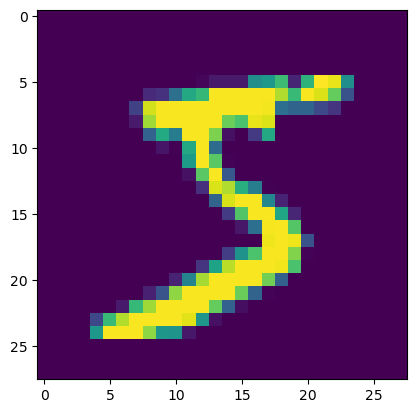

In [376]:
plt.imshow(x_train[0])   #colour scale

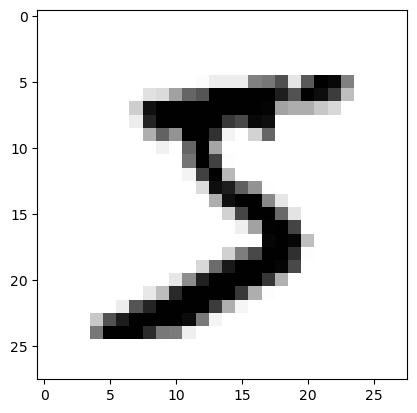

In [377]:
plt.imshow(x_train[0], cmap=plt.cm.binary)    #Gray scale

In [378]:
print(x_train[0])  #before normaloising

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [379]:
#Normalise the intensity values
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [380]:
print(x_train[0])  #After normalising-- values are scaled between 0 to 1, makes it easier to understand for the model

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

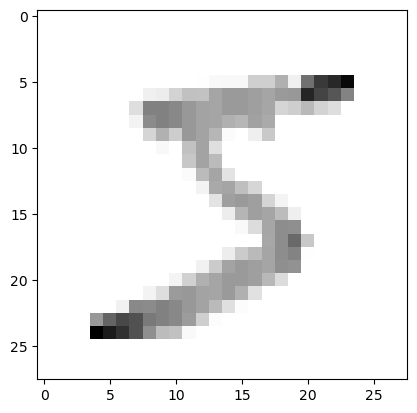

In [381]:
plt.imshow(x_train[0], cmap=plt.cm.binary)  #observe the slight difference in the intensity levels

In [382]:
#Building Model
model = Sequential()

#Input layer
model.add(Flatten())

# First hidden layer
model.add(Dense(1024 * 10, activation='relu'))

# Second hidden layer
model.add(Dense(1024, activation='relu'))

# third hidden layer
model.add(Dense(512, activation='relu'))

# forth hidden layer
model.add(Dense(128, activation='relu'))

# Output layer
model.add(Dense(10, activation='softmax'))


In [383]:
# compiling model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [384]:
# training model
model.fit(x_train, y_train, epochs=3, batch_size=120,validation_data=(x_test, y_test))


Epoch 1/3
500/500 ━━━━━━━━━━━━━━━━━━━━ 95s 184ms/step - accuracy: 0.8779 - loss: 0.3815 - val_accuracy: 0.9594 - val_loss: 0.1339
Epoch 2/3
213/500 ━━━━━━━━━━━━━━━━━━━━ 51s 180ms/step - accuracy: 0.9745 - loss: 0.0900

KeyboardInterrupt: 

In [ ]:
# Evluating model
val_loss, val_acc=model.evaluate(x_test,y_test)
print("Test Loss: ",val_loss, "\nTest Accuracy: ", val_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9697 - loss: 0.1086
Test Loss:  0.0921882912516594 
Test Accuracy:  0.9739999771118164


# Model Inference



In [ ]:
prediction=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


## Display the prediction of test[1]

In [ ]:
print(np.argmax(prediction[1]))
# predict_label=np.argmax(prediction,axis=1)

2


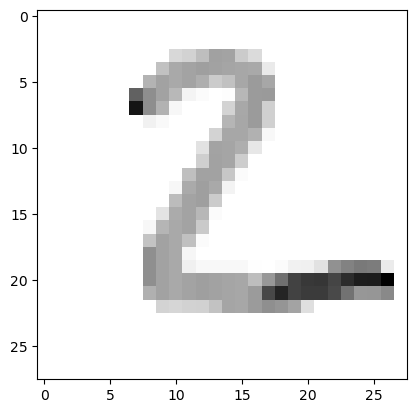

In [ ]:
plt.imshow(x_test[1],cmap=plt.cm.binary)

## Display the prediction of test[100]

In [ ]:
print(np.argmax(prediction[100]))
# predict_label=np.argmax(prediction,axis=1)

6


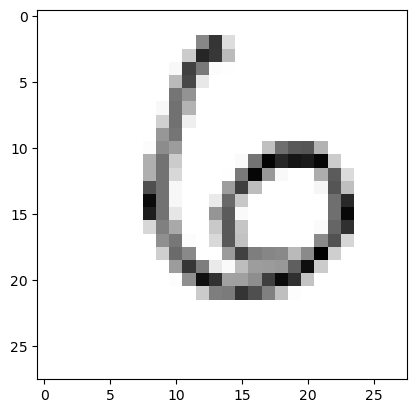

In [ ]:
plt.imshow(x_test[100],cmap=plt.cm.binary)